In [1]:
import pandas as pd
import numpy as np
import acquire
# reloads import files each time a cell is ran
%load_ext autoreload
%autoreload 2

## 1. Store Data Prep Function Building

In [2]:
df = acquire.acquire_store_data()
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    913000 non-null  float64
 1   sale_date      913000 non-null  object 
 2   sale_id        913000 non-null  int64  
 3   item_brand     913000 non-null  object 
 4   item_id        913000 non-null  int64  
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   item_upc12     913000 non-null  int64  
 8   item_upc14     913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_city     913000 non-null  object 
 11  store_id       913000 non-null  int64  
 12  store_state    913000 non-null  object 
 13  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 104.5+ MB


,sale_amount,sale_date,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


#### Convert date column to DateTime format:

In [3]:
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')
df.head(2)

,sale_amount,sale_date,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,13.0,2013-01-01 00:00:00+00:00,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,11.0,2013-01-02 00:00:00+00:00,2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   sale_amount    913000 non-null  float64            
 1   sale_date      913000 non-null  datetime64[ns, GMT]
 2   sale_id        913000 non-null  int64              
 3   item_brand     913000 non-null  object             
 4   item_id        913000 non-null  int64              
 5   item_name      913000 non-null  object             
 6   item_price     913000 non-null  float64            
 7   item_upc12     913000 non-null  int64              
 8   item_upc14     913000 non-null  int64              
 9   store_address  913000 non-null  object             
 10  store_city     913000 non-null  object             
 11  store_id       913000 non-null  int64              
 12  store_state    913000 non-null  object             
 13  store_zipcode  913000 non-nul

#### Plot the distribution of sale_amount and item_price:

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

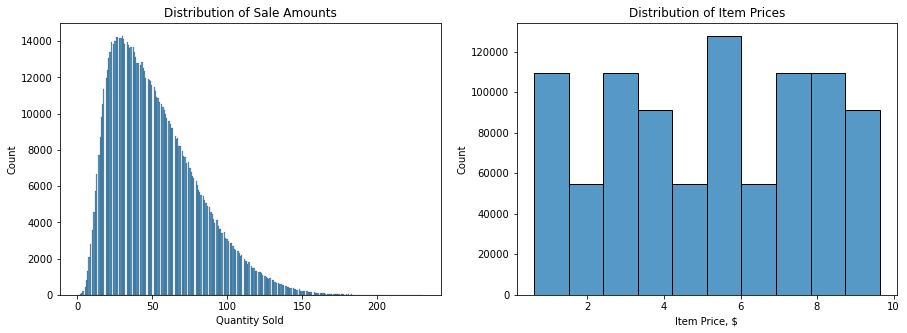

In [6]:
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.title('Distribution of Sale Amounts')
plt.xlabel('Quantity Sold')
sns.histplot(df.sale_amount)
plt.subplot(122)
plt.title('Distribution of Item Prices')
plt.xlabel('Item Price, $')
sns.histplot(df.item_price, bins=10)
plt.show()

#### Set index to DateTime variable

In [7]:
df = df.set_index('sale_date')
df.head(2)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-02 00:00:00+00:00,11.0,2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


#### Add a month, and day of week to dataframe

In [8]:
df['month'] = df.index.month
df['day_of_week'] = df.index.day_name()
df.head(2)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Tuesday
2013-01-02 00:00:00+00:00,11.0,2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Wednesday


#### Add sales_total (q*p)

In [9]:
df['sales_total'] = df.sale_amount * df.item_price
df.head(2)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Tuesday,10.92
2013-01-02 00:00:00+00:00,11.0,2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Wednesday,9.24


#### Altogethernow

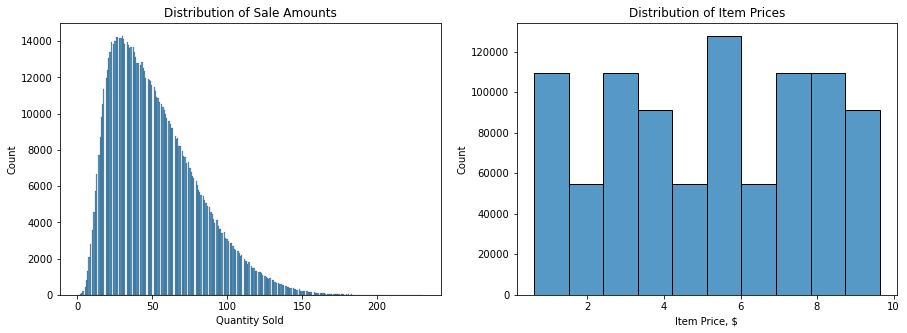

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Tuesday,10.92
2013-01-02 00:00:00+00:00,11.0,2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Wednesday,9.24
2013-01-03 00:00:00+00:00,14.0,3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Thursday,11.76
2013-01-04 00:00:00+00:00,13.0,4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Friday,10.92
2013-01-05 00:00:00+00:00,10.0,5,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Saturday,8.40


In [10]:
from prepare import store_data_prep
df = store_data_prep()
df.head(5)

## 2. OPS Data Prepare Function Building

In [11]:
df = acquire.OPS_acquire()
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 205.5+ KB


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN


#### Convert date column to DateTime format:

In [12]:
df.Date = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 205.5 KB


#### Set date as index

In [13]:
df = df.set_index('Date')

#### Plot all variables

Count of days of Consumption at a given energy level (x-axis):


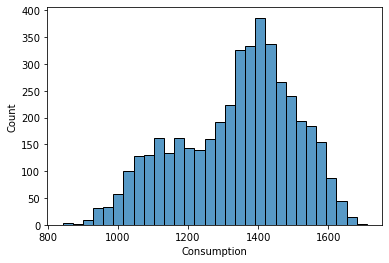

----------

Count of days of Wind at a given energy level (x-axis):


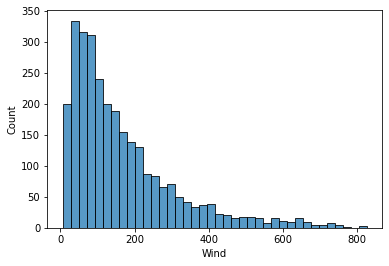

----------

Count of days of Solar at a given energy level (x-axis):


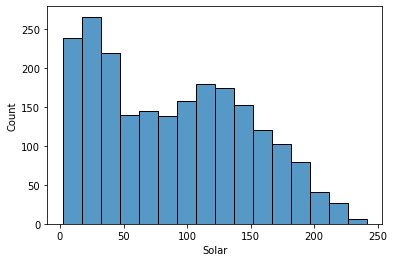

----------

Count of days of Wind+Solar at a given energy level (x-axis):


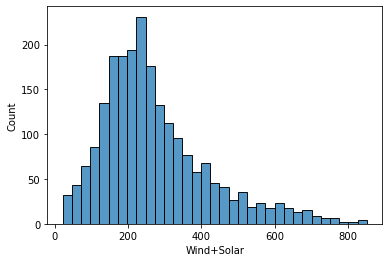

----------



In [14]:
for col in df.columns:
    print(f'Count of days of {col} at a given energy level (x-axis):')
    sns.histplot(df[col])
    plt.show()
    print('----------\n')

#### Add a month and year column to dataframe

In [15]:
df['month'] = df.index.month
df['year'] = df.index.year
df.head(2)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006


#### Fill in any missing values.

I am assuming that the NaNs are because those renewable sources were not online at the time, thus we can replace them all with zeros.

In [16]:
df = df.fillna(value=0)
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


#### Let's plot all the electricity things against one another over time for funsies

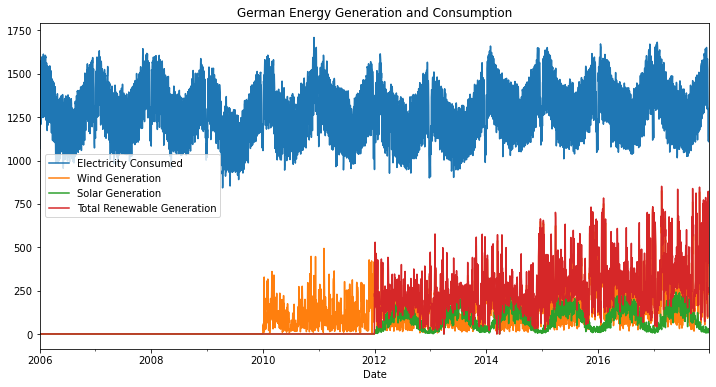

In [17]:
plt.figure(figsize = (12,6))
df.Consumption.plot(label='Electricity Consumed')
df.Wind.plot(label='Wind Generation')
df.Solar.plot(label='Solar Generation')
df['Wind+Solar'].plot(label='Total Renewable Generation')
plt.title('German Energy Generation and Consumption')
plt.xlabel("Date")
plt.legend()
plt.show()

In [18]:
df_monthly = df.resample('M').mean()

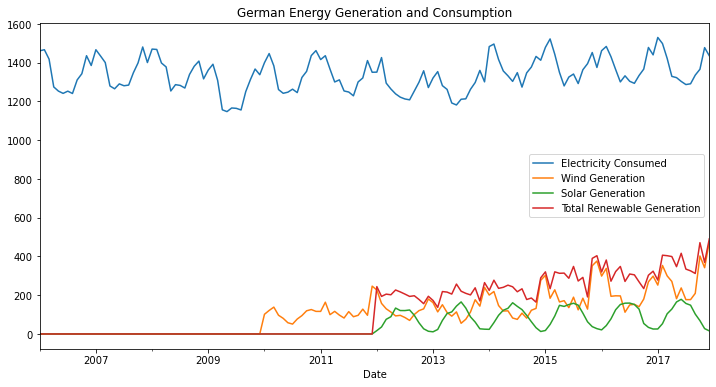

In [19]:
plt.figure(figsize = (12,6))
df_monthly.Consumption.plot(label='Electricity Consumed')
df_monthly.Wind.plot(label='Wind Generation')
df_monthly.Solar.plot(label='Solar Generation')
df_monthly['Wind+Solar'].plot(label='Total Renewable Generation')
plt.title('German Energy Generation and Consumption')
plt.xlabel("Date")
plt.legend()
plt.show()

Ahh, looks like Wind+Solar doesn't start showing the true total until solar goes online, so will have to replace those values when wind > 0 but wind+solar = 0.

In [20]:
df_monthly['Wind+Solar'] = df_monthly.Wind + df_monthly.Solar
df_monthly.sample(25)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2008-08-31,1269.323484,0.000000,0.000000,0.000000,8.0,2008.0
2006-02-28,1467.106893,0.000000,0.000000,0.000000,2.0,2006.0
2016-03-31,1431.122710,194.521839,77.876677,272.398516,3.0,2016.0
2017-11-30,1477.990818,341.966700,27.701467,369.668167,11.0,2017.0
2007-10-31,1398.924581,0.000000,0.000000,0.000000,10.0,2007.0
2015-12-31,1375.545516,376.452774,27.449903,403.902677,12.0,2015.0
2011-12-31,1350.761871,246.943194,0.000000,246.943194,12.0,2011.0
2007-02-28,1434.484357,0.000000,0.000000,0.000000,2.0,2007.0
2014-06-30,1303.712233,82.449900,161.119433,243.569333,6.0,2014.0


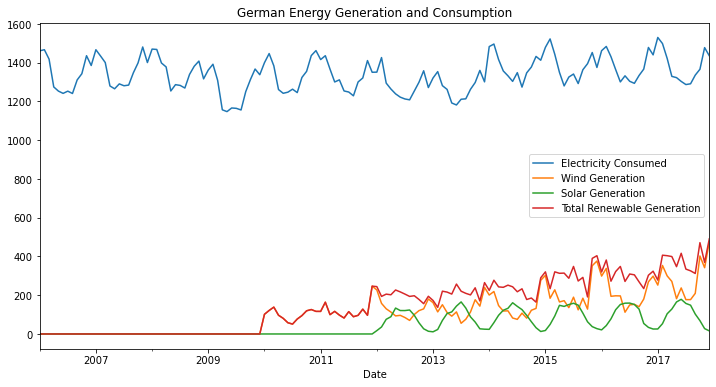

In [21]:
plt.figure(figsize = (12,6))
df_monthly.Consumption.plot(label='Electricity Consumed')
df_monthly.Wind.plot(label='Wind Generation')
df_monthly.Solar.plot(label='Solar Generation')
df_monthly['Wind+Solar'].plot(label='Total Renewable Generation')
plt.title('German Energy Generation and Consumption')
plt.xlabel("Date")
plt.legend()
plt.show()

#### Altogether:

In [31]:
from prepare import OPS_data_prep

Count of days of Consumption at a given energy level (x-axis):


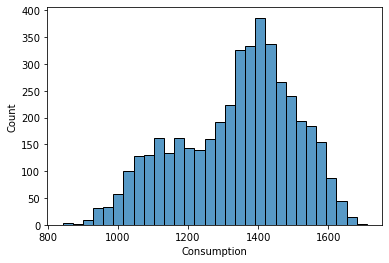

----------

Count of days of Wind at a given energy level (x-axis):


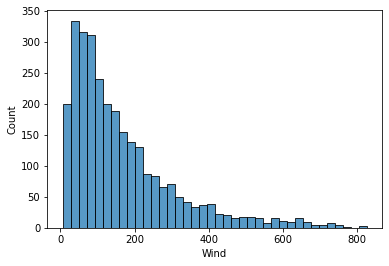

----------

Count of days of Solar at a given energy level (x-axis):


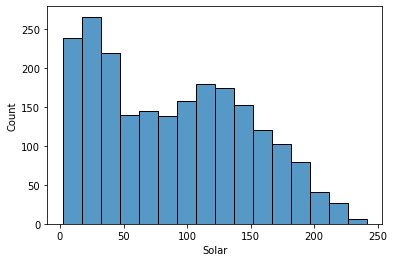

----------

Count of days of Wind+Solar at a given energy level (x-axis):


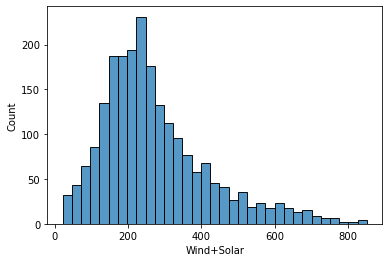

----------



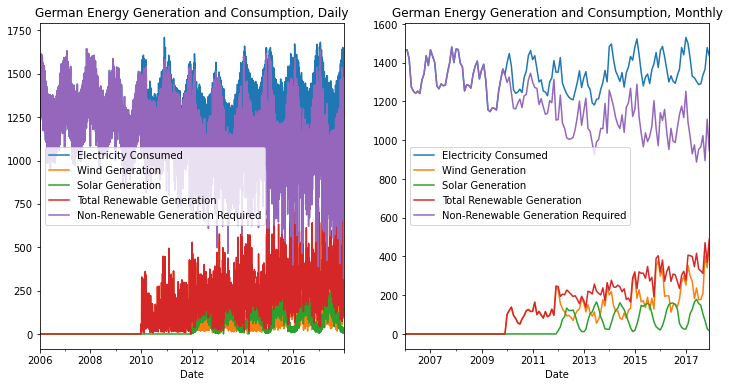

In [32]:
df = OPS_data_prep()